In [1]:
%load_ext pycodestyle_magic
%flake8_on

In [41]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, scale

## Load Advertising Data

In [42]:
adv = pd.read_csv(r"Data/Advertising.csv", index_col=0)
adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


## Load Credit Data

In [43]:
credit = pd.read_csv(r"Data/Credit.csv", index_col=0)
credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [44]:
auto = pd.read_csv(r"Data/Auto.csv", na_values="?")
auto.dropna(inplace=True)  # Remove NAN values
auto.head()
auto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
 8   name          392 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 30.6+ KB


## Load Auto Data

## Figure 3.1

Intercept: 7.032593549127695
Coefficient: [0.04753664]


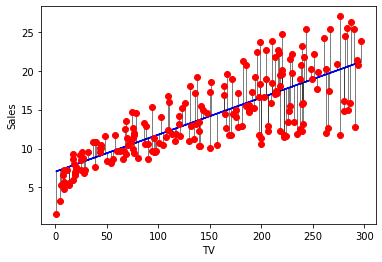

15:5: E741 ambiguous variable name 'l'


In [45]:
X = adv["TV"].values.reshape(-1, 1)
X_cen = scale(adv["TV"], with_mean=True, with_std=False).reshape(-1, 1)
y = adv["Sales"]
rgr = LinearRegression()
rgr.fit(X, y)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel("TV")
ax.set_ylabel("Sales")
ax.plot(X, rgr.predict(X), "b-")


for item in zip(X[:, 0], y, rgr.predict(X)):
    l = mlines.Line2D([item[0], item[0]], [item[1], item[2]])
    l.set_color("black")
    l.set_linewidth(0.5)
    ax.add_line(l)
ax.plot(X, y, "ro")

print(f"Intercept: {rgr.intercept_}")
print(f"Coefficient: {rgr.coef_}")

## Figure 3.2

In [46]:
# Create grid coordinates for plotting
B0 = np.linspace(rgr.intercept_ - 2, rgr.intercept_ + 2, 50)
B1 = np.linspace(rgr.coef_ - 0.02, rgr.coef_ + 0.02, 50)
xx, yy = np.meshgrid(B0, B1, indexing="xy")

In [47]:
B = np.array((xx, yy)).reshape(2, -1)
X1 = np.hstack((np.ones(X.shape), X))
RSS2 = np.sum(
    ((y.values.reshape(-1, 1) - np.dot(X1, B)) ** 2) / 1000, axis=0, keepdims=True
)
RSS = RSS2.reshape(xx.shape)
min_RSS = RSS.min()

4:80: E501 line too long (82 > 79 characters)


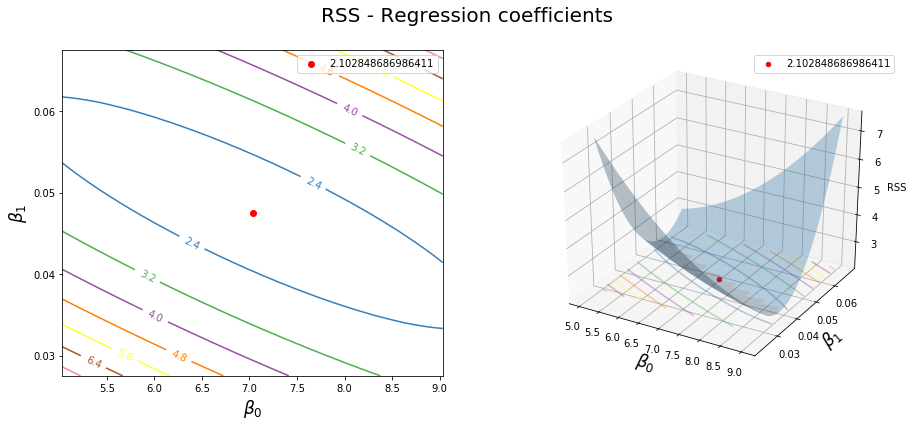

In [49]:
fig = plt.figure(figsize=(15, 6))
fig.suptitle("RSS - Regression coefficients", fontsize=20)

ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

# Left plot
CS = ax1.contour(xx, yy, RSS, cmap=plt.cm.Set1)
ax1.scatter(rgr.intercept_, rgr.coef_[0], c="r", label=min_RSS)
ax1.clabel(CS, inline=True, fontsize=10, fmt="%1.1f")

# Right plot
ax2.plot_surface(xx, yy, RSS, rstride=3, cstride=3, alpha=0.3)
ax2.contour(xx, yy, RSS, zdir="z", offset=RSS.min(), cmap=plt.cm.Set1, alpha=0.4)

ax2.scatter3D(rgr.intercept_, rgr.coef_[0], RSS.min(), c="r", label=min_RSS)
ax2.set_zlabel("RSS")
ax2.set_zlim(RSS.min(), RSS.max())
ax2.set_ylim(0.02, 0.07)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r"$\beta_0$", fontsize=17)
    ax.set_ylabel(r"$\beta_1$", fontsize=17)
    ax.set_yticks([0.03, 0.04, 0.05, 0.06])
    ax.legend()

## Figure3.3

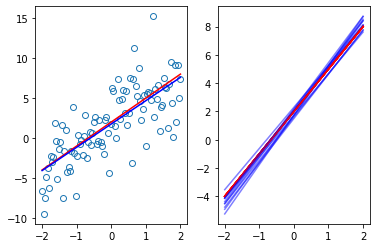

In [50]:
num = 100
x = np.linspace(-2, 2, num).reshape(-1, 1)


def gen_data(x):
    eps = [np.random.normal(scale=3) for i in range(num)]
    return 2 + 3 * x.ravel() + eps, eps


fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
y, eps = gen_data(x)
ax.plot(x, y, "o", fillstyle="none")
ax.plot(x, y - eps, "r-")
rgr.fit(x, y)
ax.plot(x, rgr.predict(x), "-b")
ax2 = fig.add_subplot(1, 2, 2)

for _ in range(10):
    y, eps = gen_data(x)
    ax2.plot(x, y - eps, "r-")
    rgr.fit(x, y)
    ax2.plot(x, rgr.predict(x), "b-", alpha=0.5)

## TABLE 3.1

In [51]:
# Fit regression model (using the natural log of one of the regressors)
results = smf.ols("Sales ~ TV", data=adv).fit()

In [52]:
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


## TABLE 3.2

In [53]:
results.summary().tables[0]

Dep. Variable:,Sales,R-squared:,0.612
Model:,OLS,Adj. R-squared:,0.610
Method:,Least Squares,F-statistic:,312.1
Date:,"Thu, 20 Feb 2020",Prob (F-statistic):,1.47e-42
Time:,11:32:16,Log-Likelihood:,-519.05
No. Observations:,200,AIC:,1042.
Df Residuals:,198,BIC:,1049.
Df Model:,1,,
Covariance Type:,nonrobust,,


## TABLE 3.3

In [54]:
results = smf.ols("Sales ~ Radio", data=adv).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
Radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [55]:
results = smf.ols("Sales ~ Newspaper", data=adv).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
Newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


## TABLE 3.4

In [56]:
results = smf.ols("Sales ~ TV + Radio+Newspaper", data=adv).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
Radio,0.1885,0.009,21.893,0.000,0.172,0.206
Newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


## TABLE 3.5

In [57]:
RSE = np.sqrt(np.sum(results.resid ** 2) / results.df_resid)
print(f"RSE: {RSE}")
results.summary().tables[0]

RSE: 1.685510373414744


Dep. Variable:,Sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Thu, 20 Feb 2020",Prob (F-statistic):,1.58e-96
Time:,11:32:19,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


## TABLE 3.6

In [65]:
print(np.corrcoef([adv["TV"], adv["Radio"], adv["Newspaper"], adv["Sales"]]))

[[1.         0.05480866 0.05664787 0.78222442]
 [0.05480866 1.         0.35410375 0.57622257]
 [0.05664787 0.35410375 1.         0.22829903]
 [0.78222442 0.57622257 0.22829903 1.        ]]


## Figure 3.6

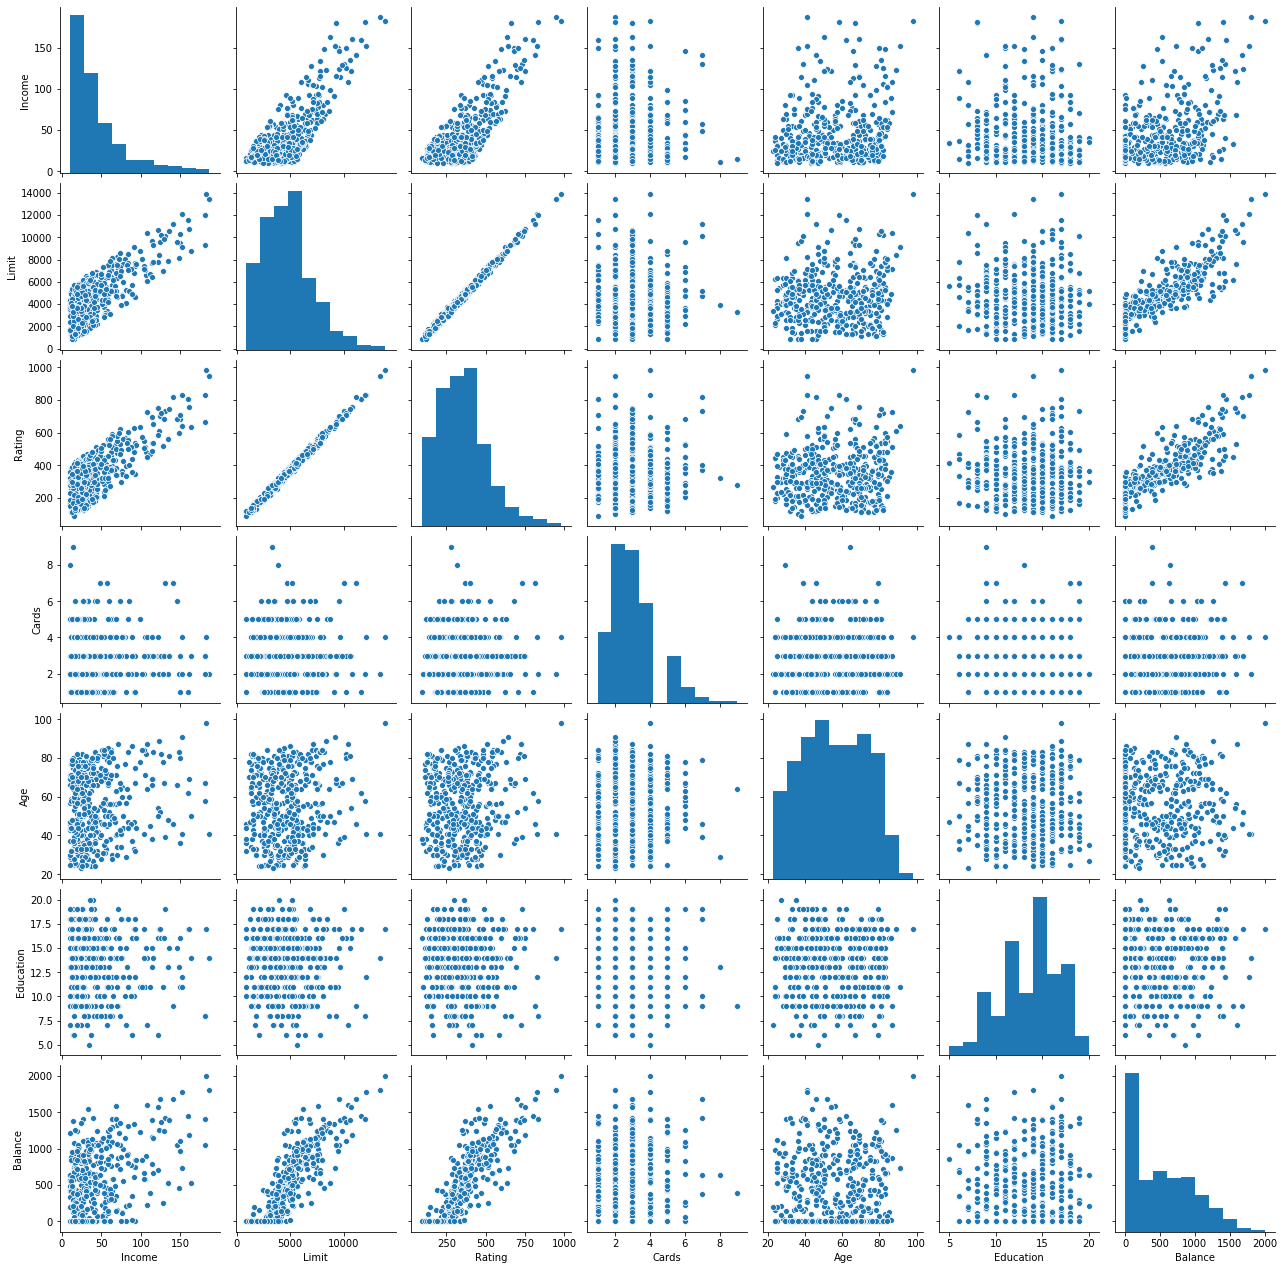

1:21: E703 statement ends with a semicolon


In [66]:
sns.pairplot(credit)
;

## TABLE 3.7

In [60]:
results = smf.ols("Balance ~ Gender", data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1836
Date:                Thu, 20 Feb 2020   Prob (F-statistic):              0.669
Time:                        11:32:42   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6043.
Df Residuals:                     398   BIC:                             6051.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          509.8031     33.128     15.389      0.000     444.675     574.931
Gender[T.Female]    19.7331     46.051      0.429      0.669     -70.801     110.267
==============================================================================
Omnibus:                       28.438   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.346
Skew:                           0.583   Prob(JB):                     1.15e-06
Kurtosis:                       2.471   Cond. No.                         2.66
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## TABLE 3.8

In [61]:
results = smf.ols("Balance ~ Ethnicity", data=credit).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Thu, 20 Feb 2020   Prob (F-statistic):              0.957
Time:                        11:32:42   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity[T.Asian]       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity[T.Caucasian]   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## TABLE 3.9

In [62]:
results = smf.ols("Sales~TV+Radio+TV*Radio", data=adv).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
Radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:Radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


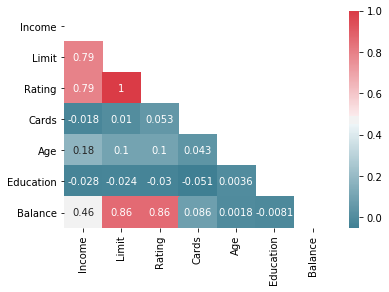

4:52: E703 statement ends with a semicolon


In [67]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr = credit.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True)
;

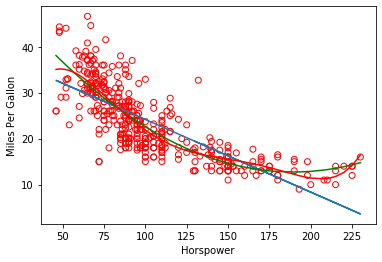

1:62: E231 missing whitespace after ','
14:80: E501 line too long (83 > 79 characters)
21:80: E501 line too long (83 > 79 characters)
23:31: E703 statement ends with a semicolon


In [120]:
plt.scatter("horsepower", "mpg", data=auto, facecolors="none", edgecolors="red")
est = LinearRegression()
X = auto["horsepower"].values.reshape(-1, 1)
y = auto["mpg"]
# Fit with degree  0
est.fit(X, y)
plt.plot(X, est.predict(X), label="Linear")

# Fit with a polynomial features (degree 2)
X2 = PolynomialFeatures(2).fit_transform(X)
est2 = LinearRegression()
est2.fit(X2, y)
order = np.argsort(X, axis=0)
plt.plot(X[order].ravel(), est2.predict(X2)[order].ravel(), "-g", label="Degree 2")

# Fit with a polynomial features (degree 5)
X5 = PolynomialFeatures(5).fit_transform(X)
est5 = LinearRegression()
est5.fit(X5, y)
order = np.argsort(X, axis=0)
plt.plot(X[order].ravel(), est5.predict(X5)[order].ravel(), "-r", label="Degree 5")
plt.xlabel("Horspower")
plt.ylabel("Miles Per Gallon")
;

## TABLE 3.10

In [119]:
results = smf.ols("mpg~horsepower+np.power(horsepower,2)", data=auto).fit()
results.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,56.9001,1.800,31.604,0.000,53.360,60.440
horsepower,-0.4662,0.031,-14.978,0.000,-0.527,-0.405
"np.power(horsepower, 2)",0.0012,0.000,10.080,0.000,0.001,0.001


## Figure 3.9

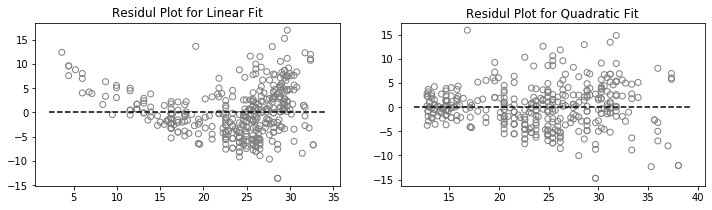

In [149]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 3))
ax[0].scatter(est.predict(X), y - est.predict(X),
              facecolors="none", edgecolors="grey")
ax[0].set_title('Residul Plot for Linear Fit')
xmin, xmax = ax[0].get_xlim()
ax[0].hlines(0, xmin, xmax, linestyles='dashed')

ax[1].scatter(est2.predict(X2), y - est2.predict(X2),
              facecolors="none", edgecolors="grey")
ax[1].set_title('Residul Plot for Quadratic Fit')
xmin, xmax = ax[1].get_xlim()
ax[1].hlines(0, xmin, xmax, linestyles='dashed')